In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:


# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/huy164/datasets/master/walmart_stock_price.csv', parse_dates=['Date'])

# Extract the target variable and the features
y = df['Close']
x = (df['Date'] - df['Date'].iloc[0]).dt.days.to_frame()

# Split the dataset into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
valid_size = len(df) - train_size - test_size
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:train_size+test_size]
y_test = y[train_size:train_size+test_size]
x_valid = x[train_size+test_size:]
y_valid = y[train_size+test_size:]

# Fit a linear regression model on the training set
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [34]:

# Evaluate the model's performance on the test set using MSE, MAE, and MAPE
y_pred_test = reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
rmse = np.sqrt(mse)

print('MSE:', mse)
print('MAE:', mae)
print('MAPE:', mape)
print('RMSE:', rmse)

MSE: 99.46755721658324
MAE: 7.353229825224998
MAPE: 10.49078145691232
RMSE: 9.973342329258694


In [35]:
# Evaluate the model's performance on the validation set using MSE, MAE, and MAPE
y_pred_valid = reg.predict(x_valid)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
mape_valid = np.mean(np.abs((y_valid - y_pred_valid) / y_valid)) * 100
rmse_valid = np.sqrt(mse_valid)

print('Validation set MSE:', mse_valid)
print('Validation set MAE:', mae_valid)
print('Validation set MAPE:', mape_valid)
print('Validation set RMSE:', rmse_valid)


Validation set MSE: 2292.546905834439
Validation set MAE: 42.923309495943805
Validation set MAPE: 35.508719752085526
Validation set RMSE: 47.88054830340228


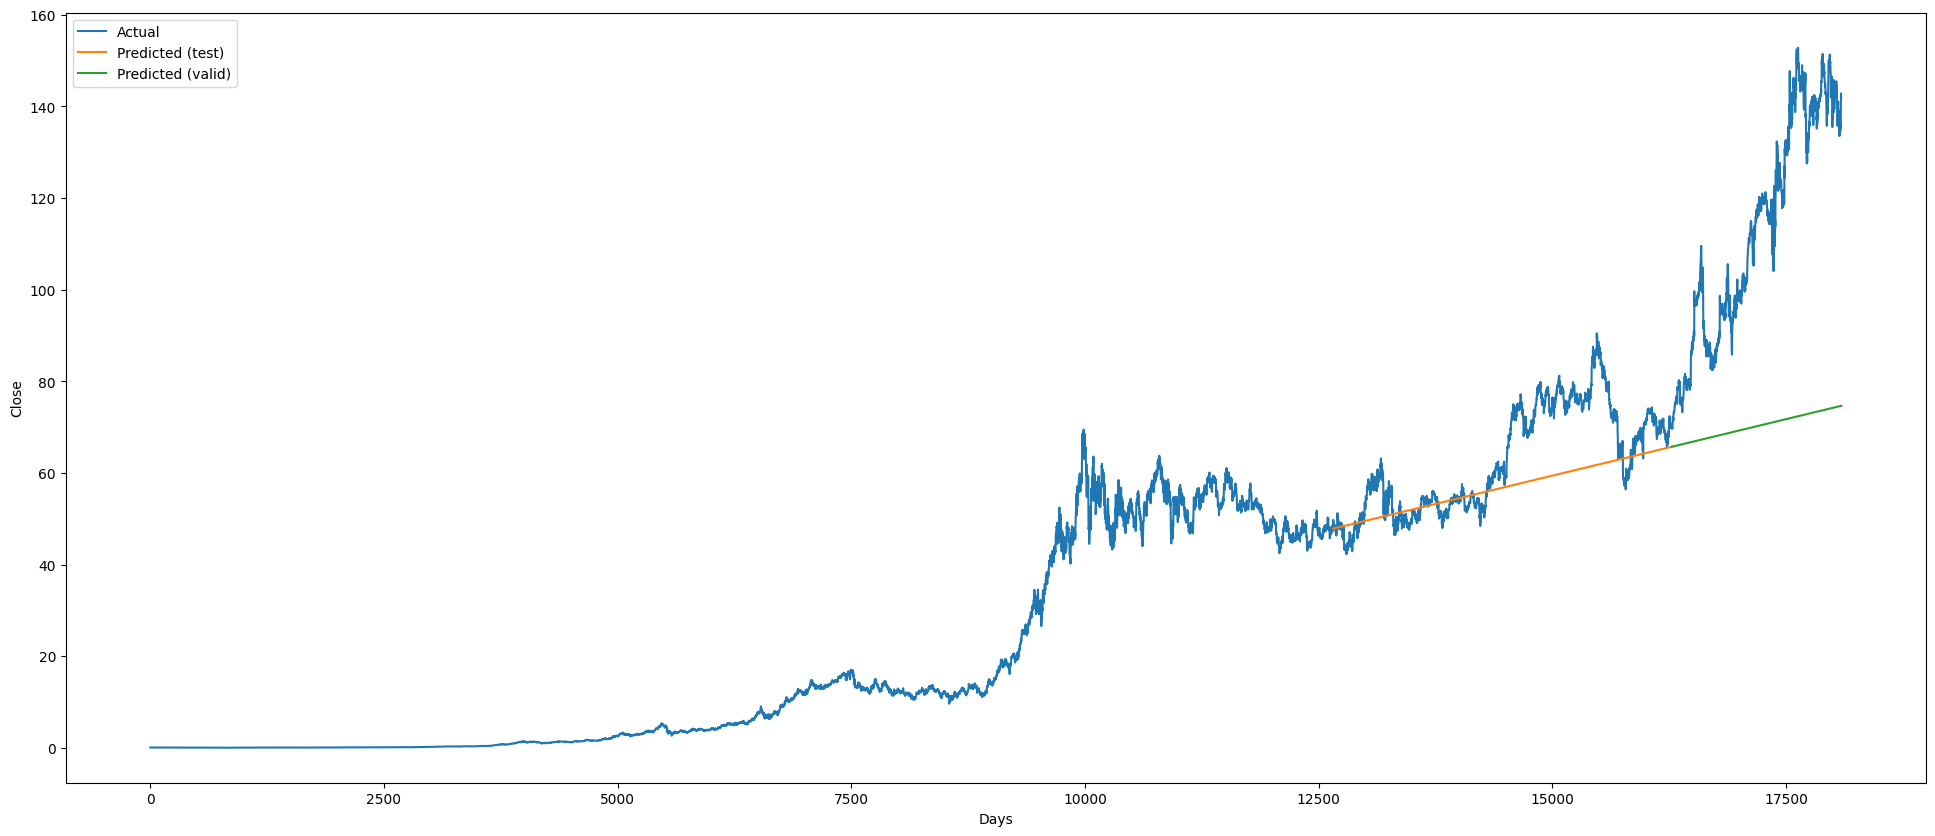

In [36]:
# Visualize the actual and predicted values for the training, testing, and validation sets
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(24, 10))

plt.plot(x, y, label='Actual')
plt.plot(x_test, y_pred_test, label='Predicted (test)')
plt.plot(x_valid, reg.predict(x_valid), label='Predicted (valid)')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Close')
plt.show()